In [1]:
#!unzip '/content/drive/MyDrive/archive.zip' && rm '/content/drive/MyDrive/archive.zip'

**Cats and Dogs Classification**

Part 1 - Data Preprocessing

In [2]:
# Importing essential libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Preprocessing the Training set

# Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Importing Training set
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Cats and Dogs Classification /data/train',
                                                    target_size=(64, 64),
                                                    batch_size=16,
                                                    class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [4]:
# Preprocessing the Test set

# Feature Scaling
test_datagen = ImageDataGenerator(rescale=1./255)

# Importing Test set
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Cats and Dogs Classification /data/validation',
                                            target_size=(64, 64),
                                            batch_size=16,
                                            class_mode='categorical')

Found 802 images belonging to 2 classes.


Part 2 - Building the CNN

In [5]:
# Importing essential libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [6]:
# Initialising the CNN
cnn = Sequential()

In [7]:
# Step 1 - Add Convolution Layer
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [8]:
# Step 2 - Add Pooling Layer
cnn.add(MaxPool2D(pool_size=2, strides=2))

In [9]:
# Add second onvolutional layer with pooling
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

In [10]:
# Step 3 - Add Flattening Layer
cnn.add(Flatten())

In [11]:
# Step 4 - Add Full Connected Layer
cnn.add(Dense(units=128, activation='relu'))

In [12]:
# Step 5 - Add Output Layer
cnn.add(Dense(units=2, activation='softmax'))

In [13]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

Part 3 - Training the CNN

In [16]:
# Compiling the CNN
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
# Training the CNN on the Training set and evaluating it on the Test set
model = cnn.fit(training_set,validation_data=test_set,epochs=10)

Epoch 1/10
125/125 [==============================] - 42s 335ms/step - loss: 0.6860 - accuracy: 0.5605 - val_loss: 0.6773 - val_accuracy: 0.5374
Epoch 2/10
125/125 [==============================] - 14s 115ms/step - loss: 0.6680 - accuracy: 0.5975 - val_loss: 0.6501 - val_accuracy: 0.6234
Epoch 3/10
125/125 [==============================] - 13s 106ms/step - loss: 0.6613 - accuracy: 0.6070 - val_loss: 0.6651 - val_accuracy: 0.5885
Epoch 4/10
125/125 [==============================] - 13s 107ms/step - loss: 0.6179 - accuracy: 0.6520 - val_loss: 0.6031 - val_accuracy: 0.6658
Epoch 5/10
125/125 [==============================] - 13s 106ms/step - loss: 0.5912 - accuracy: 0.6810 - val_loss: 0.6038 - val_accuracy: 0.6796
Epoch 6/10
125/125 [==============================] - 13s 107ms/step - loss: 0.5806 - accuracy: 0.7120 - val_loss: 0.5814 - val_accuracy: 0.7032
Epoch 7/10
125/125 [==============================] - 13s 105ms/step - loss: 0.5474 - accuracy: 0.7235 - val_loss: 0.5759 - val_ac

Part 4 - Model Evaluation

In [19]:
# Importing essential libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
# List all data in history
print(model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


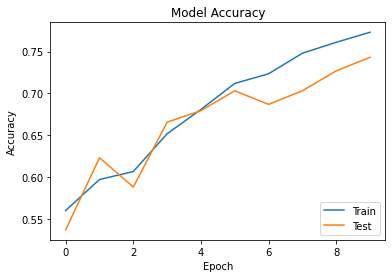

In [21]:
# Summarize history for accuracy
#plt.figure(figsize=(8,8))
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

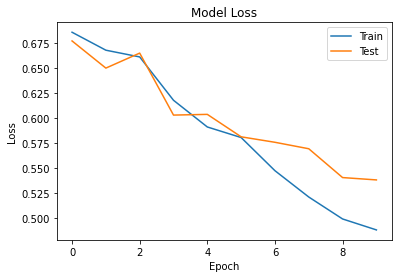

In [22]:
# Summarize history for loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Part 5 - Making Predictions

In [23]:
y_pred = cnn.predict(test_set)

51/51 [==============================] - 3s 61ms/step


In [24]:
y_pred

array([[0.6499083 , 0.35009167],
       [0.4951771 , 0.5048229 ],
       [0.9533002 , 0.04669978],
       ...,
       [0.7452459 , 0.25475413],
       [0.8747386 , 0.12526146],
       [0.12958975, 0.8704102 ]], dtype=float32)

In [25]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [26]:
y_pred

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,

In [27]:
# Importing essential libraries
from tensorflow.keras.preprocessing import image

In [47]:
img=image.load_img('/content/drive/MyDrive/Cats and Dogs Classification /test_set/test_set/dogs/dog.4105.jpg',target_size=(64,64))

In [48]:
x=image.img_to_array(img)
x

array([[[163., 136.,  55.],
        [172., 145.,  68.],
        [182., 154.,  81.],
        ...,
        [ 19.,  24.,   0.],
        [ 48.,  39.,  10.],
        [ 94.,   2.,   3.]],

       [[171., 144.,  65.],
        [176., 148.,  74.],
        [179., 150.,  80.],
        ...,
        [ 19.,  10.,   3.],
        [191.,   0.,   1.],
        [ 28.,  85.,  34.]],

       [[168., 140.,  66.],
        [177., 148.,  78.],
        [184., 155.,  89.],
        ...,
        [105.,   3.,  14.],
        [ 89.,  41.,   0.],
        [ 66.,  72.,  44.]],

       ...,

       [[159., 139.,  78.],
        [165., 144.,  87.],
        [169., 148.,  93.],
        ...,
        [142., 124.,  62.],
        [142., 123.,  64.],
        [133., 118.,  53.]],

       [[157., 137.,  76.],
        [167., 146.,  89.],
        [165., 144.,  89.],
        ...,
        [136., 118.,  54.],
        [131., 113.,  51.],
        [135., 117.,  51.]],

       [[146., 126.,  65.],
        [156., 135.,  78.],
        [162., 1

In [49]:
x.shape

(64, 64, 3)

In [50]:
x = x/255
x

array([[[0.6392157 , 0.53333336, 0.21568628],
        [0.6745098 , 0.5686275 , 0.26666668],
        [0.7137255 , 0.6039216 , 0.31764707],
        ...,
        [0.07450981, 0.09411765, 0.        ],
        [0.1882353 , 0.15294118, 0.03921569],
        [0.36862746, 0.00784314, 0.01176471]],

       [[0.67058825, 0.5647059 , 0.25490198],
        [0.6901961 , 0.5803922 , 0.2901961 ],
        [0.7019608 , 0.5882353 , 0.3137255 ],
        ...,
        [0.07450981, 0.03921569, 0.01176471],
        [0.7490196 , 0.        , 0.00392157],
        [0.10980392, 0.33333334, 0.13333334]],

       [[0.65882355, 0.54901963, 0.25882354],
        [0.69411767, 0.5803922 , 0.30588236],
        [0.72156864, 0.60784316, 0.34901962],
        ...,
        [0.4117647 , 0.01176471, 0.05490196],
        [0.34901962, 0.16078432, 0.        ],
        [0.25882354, 0.28235295, 0.17254902]],

       ...,

       [[0.62352943, 0.54509807, 0.30588236],
        [0.64705884, 0.5647059 , 0.34117648],
        [0.6627451 , 0

In [51]:
x = np.expand_dims(x, axis = 0)
x.shape

(1, 64, 64, 3)

In [52]:
cnn.predict(x)

1/1 [==============================] - 0s 22ms/step


array([[0.02564074, 0.9743593 ]], dtype=float32)

In [53]:
a=np.argmax(cnn.predict(x), axis=1)
a

1/1 [==============================] - 0s 15ms/step


array([1])

In [54]:
if(a==1):
  print("Prediction: It's a Dog's image.")
else:
  print("Prediction: It's a Cat's image.")

Prediction: It's a Dog's image.


Prediction 2

In [55]:
test_image = image.load_img('/content/drive/MyDrive/Cats and Dogs Classification /test_set/test_set/cats/cat.4087.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image

array([[[115., 140., 134.],
        [122., 147., 141.],
        [122., 151., 147.],
        ...,
        [ 93., 105., 119.],
        [115., 127., 141.],
        [203., 211., 200.]],

       [[121., 146., 140.],
        [125., 150., 144.],
        [121., 150., 146.],
        ...,
        [131., 146., 141.],
        [134., 148., 149.],
        [172., 193., 174.]],

       [[121., 146., 140.],
        [125., 150., 144.],
        [123., 152., 148.],
        ...,
        [134., 149., 144.],
        [133., 146., 154.],
        [163., 175., 171.]],

       ...,

       [[141., 137., 128.],
        [155., 146., 129.],
        [173., 165., 144.],
        ...,
        [ 95., 106., 102.],
        [112., 123., 115.],
        [109., 119., 118.]],

       [[200., 197., 180.],
        [220., 213., 187.],
        [238., 235., 204.],
        ...,
        [ 97., 107., 108.],
        [100., 111., 107.],
        [ 94., 109., 102.]],

       [[255., 252., 233.],
        [255., 255., 246.],
        [255., 2

In [56]:
test_image = test_image/255

In [57]:
test_image = np.expand_dims(test_image, axis = 0)
test_image.shape

(1, 64, 64, 3)

In [58]:
cnn.predict(test_image)

1/1 [==============================] - 0s 16ms/step


array([[0.71181166, 0.28818834]], dtype=float32)

In [59]:
res = np.argmax(cnn.predict(test_image), axis=1)
res

1/1 [==============================] - 0s 17ms/step


array([0])

In [60]:
if(res==1):
  print("Prediction: It's a Dog's image.")
else:
  print("Prediction: It's a Cat's image.")

Prediction: It's a Cat's image.
